In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import os
from scipy.io import wavfile
import soundfile

from nnAudio import Spectrogram # If you don't have nnAudio, you can simply do pip install nnAudio

os.environ['CUDA_VISIBLE_DEVICES']='0' # Choosing which GPU to use

if torch.cuda.is_available(): # Use GPU when it is avaliable
    device = "cuda:0"

In [2]:
sound, sr = soundfile.read('./BWV846.wav')

In [4]:
sound = sound.sum(1)

In [6]:
mel_layer = Spectrogram.MelSpectrogram(sr=sr, n_fft=2048, n_mels=128, hop_length=512, fmax=1500)

STFT filter created, time used = 4.6309 seconds
Mel filter created, time used = 0.0041 seconds


In [7]:
sound = torch.tensor(sound).float().to(device)

In [8]:
spec = mel_layer(sound)

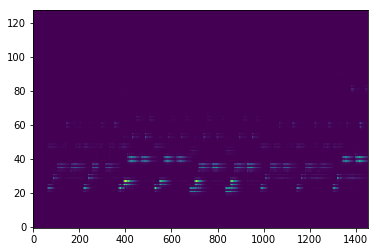

In [9]:
plt.imshow(spec[0].cpu().numpy(), aspect='auto', origin='lower')